In [1]:
import pandas as pd
import numpy as np

In [2]:
health = pd.read_csv('국민건강보험공단_건강검진정보_20211229.csv', encoding='cp949')
health

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


시력, 청력, 치아마모증. 사랑니는 당뇨와 연관이 없기에 해당 feature는 삭제

In [3]:
del health['기준년도']
del health['가입자 일련번호']
del health['시도코드']
del health['시력(좌)']
del health['시력(우)']
del health['청력(좌)']
del health['청력(우)']
del health['구강검진 수검여부']
del health['데이터 공개일자']
health

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,치아우식증유무,치석
0,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,...,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,NaN,NaN
1,2,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,...,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,NaN,NaN
2,2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,...,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,NaN,NaN
3,1,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,...,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,0.0,0.0
4,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,...,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,13,145,55,81.0,132.0,78.0,124.0,178.0,301.0,...,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0,NaN,NaN
999996,2,12,160,55,76.5,100.0,64.0,98.0,288.0,93.0,...,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0,NaN,NaN
999997,1,9,175,70,85.0,110.0,64.0,83.0,NaN,NaN,...,16.0,1.0,0.9,26.0,20.0,17.0,1.0,1.0,NaN,NaN
999998,2,9,160,70,91.0,137.0,82.0,111.0,208.0,113.0,...,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0,NaN,NaN


In [4]:
health.isnull().sum()

성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
치아우식증유무         668617
치석              668618
dtype: int64

당뇨는 콜레스테롤과 연관되어 있기때문에 콜레스테롤 데이터가 없는 instance는 삭제하겠습니다.

In [5]:
health = health.dropna(subset=['HDL 콜레스테롤','LDL 콜레스테롤','총 콜레스테롤'])
health

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,치아우식증유무,치석
0,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,...,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,NaN,NaN
4,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,...,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,NaN,NaN
5,1,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,...,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0,NaN,NaN
6,1,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,...,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0,0.0,1.0
8,2,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,...,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,1,13,175,90,99.5,120.0,74.0,98.0,142.0,121.0,...,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0,NaN,NaN
999995,2,13,145,55,81.0,132.0,78.0,124.0,178.0,301.0,...,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0,NaN,NaN
999996,2,12,160,55,76.5,100.0,64.0,98.0,288.0,93.0,...,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0,NaN,NaN
999998,2,9,160,70,91.0,137.0,82.0,111.0,208.0,113.0,...,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0,NaN,NaN


In [6]:
health.isnull().sum()

성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레                61
수축기 혈압              10
이완기 혈압              10
식전혈당(공복혈당)           0
총 콜레스테롤              0
트리글리세라이드             0
HDL 콜레스테롤            0
LDL 콜레스테롤            0
혈색소                  7
요단백               2007
혈청크레아티닌              0
(혈청지오티)AST           0
(혈청지오티)ALT           1
감마 지티피               1
흡연상태               160
음주여부                86
치아우식증유무         268211
치석              268211
dtype: int64

치석과 치아우식증은 당뇨를 유발하는 요인으로 볼 수 있으나 현재 데이터에 null값이 너무 많으므로 feature에서 제외하겠습니다.
또한, 데이터에 null값을 가지고 있는 instance는 삭제하겠습니다.
instance를 삭제해도 30만개 이상의 데이터를 가지고있기 때문에 분석을 진행하는데 문제는 없을 것으로 판단했습니다.

In [7]:
del health['치아우식증유무']
del health['치석']

In [8]:
health = health.dropna()
health

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
4,2,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
5,1,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0
6,1,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0
8,2,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,1,13,175,90,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0
999995,2,13,145,55,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0
999996,2,12,160,55,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0
999998,2,9,160,70,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0


In [9]:
#데이터에 null 값이 없음을 확인
health.isnull().sum()

성별코드            0
연령대 코드(5세단위)    0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
총 콜레스테롤         0
트리글리세라이드        0
HDL 콜레스테롤       0
LDL 콜레스테롤       0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마 지티피          0
흡연상태            0
음주여부            0
dtype: int64

In [10]:
#신장과 체중은 BMI로 환산하여 계산
health.rename(columns={'신장(5Cm단위)':'BMI'},inplace=True)
health['BMI']= health['BMI']*0.01
health['BMI']= round(health['체중(5Kg 단위)']/(health['BMI']**2),2)
del health['체중(5Kg 단위)']
health

C:\Users\choib\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-10-ef3ef6f04d44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health['BMI']= health['BMI']*0.01
<ipython-input-10-ef3ef6f04d44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,성별코드,연령대 코드(5세단위),BMI,허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,9,22.04,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
4,2,12,20.81,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
5,1,9,24.84,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0
6,1,9,29.38,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0
8,2,17,22.22,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,1,13,29.39,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0
999995,2,13,26.16,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0
999996,2,12,21.48,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0
999998,2,9,27.34,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0


In [11]:
health.rename(columns = {'성별코드':'Sex','연령대 코드(5세단위)':'Age','허리둘레':'waist',
                            '수축기 혈압':'SysPre','이완기 혈압':'DiaPre','식전혈당(공복혈당)':'FBS',
                           '총 콜레스테롤':'Chole_Sum','트리글리세라이드':'Triglycerides','HDL 콜레스테롤':'HDL_Chole',
                           'LDL 콜레스테롤':'LDL_Chole','혈색소':'Hemoglobin','요단백':'ProteinInUrine',
                           '혈청크레아티닌':'SerumCreatinine','(혈청지오티)AST':'AST','(혈청지오티)ALT':'ALT','감마 지티피':'GammaGTP	',
                           '흡연상태':'Smoke','음주여부':'Drink'},inplace=True)
health

C:\Users\choib\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Sex,Age,BMI,waist,SysPre,DiaPre,FBS,Chole_Sum,Triglycerides,HDL_Chole,LDL_Chole,Hemoglobin,ProteinInUrine,SerumCreatinine,AST,ALT,GammaGTP\t,Smoke,Drink
0,1,9,22.04,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
4,2,12,20.81,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
5,1,9,24.84,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0
6,1,9,29.38,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0
8,2,17,22.22,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,1,13,29.39,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0
999995,2,13,26.16,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0
999996,2,12,21.48,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0
999998,2,9,27.34,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0


성별은 1이 남자. 2가 여자이므로 각각 0과 1로,
흡연여부는 1이 피우지않는다, 2가 피우다가 끊었다, 3은 피우고있음 이므로
           2,3은 1 -> yes, 1은 0 -> no
음주여부는 1 -> yes, 0 -> no

In [12]:
health = health.astype({'Smoke':int,'Drink':int})

In [13]:
health['Sex'].value_counts()

2    202281
1    189883
Name: Sex, dtype: int64

In [14]:
health['Drink'].value_counts()

1    223516
0    168648
Name: Drink, dtype: int64

In [15]:
health['Smoke'].value_counts()

1    253527
2     72151
3     66486
Name: Smoke, dtype: int64

In [16]:
health = health.replace({'Sex':1},0)
health = health.replace({'Sex':2},1)
health = health.replace({'Smoke':1},0)
health = health.replace({'Smoke':2},1)
health = health.replace({'Smoke':3},1)
health

,Sex,Age,BMI,waist,SysPre,DiaPre,FBS,Chole_Sum,Triglycerides,HDL_Chole,LDL_Chole,Hemoglobin,ProteinInUrine,SerumCreatinine,AST,ALT,GammaGTP\t,Smoke,Drink
0,0,9,22.04,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,0,0
4,1,12,20.81,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,0,0
5,0,9,24.84,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,1,1
6,0,9,29.38,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,1,1
8,1,17,22.22,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,0,13,29.39,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,1.0,0.8,66.0,58.0,36.0,1,1
999995,1,13,26.16,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,0,0
999996,1,12,21.48,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,0,1
999998,1,9,27.34,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,0,0


In [17]:
health['Smoke'].value_counts()

0    253527
1    138637
Name: Smoke, dtype: int64

In [18]:
health['Sex'].value_counts()

1    202281
0    189883
Name: Sex, dtype: int64

In [19]:
health.describe()

,Sex,Age,BMI,waist,SysPre,DiaPre,FBS,Chole_Sum,Triglycerides,HDL_Chole,LDL_Chole,Hemoglobin,ProteinInUrine,SerumCreatinine,AST,ALT,GammaGTP\t,Smoke,Drink
count,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000,392164.000000
mean,0.515807,11.944549,24.146943,82.135801,124.706072,76.535712,103.766536,197.862700,125.139320,57.029107,115.879023,14.151727,1.125404,0.846494,27.655698,26.436611,35.923081,0.353518,0.569955
std,0.499751,2.282080,3.552397,9.768170,14.853920,9.983144,24.615680,42.586859,67.779608,16.386408,39.188961,1.553039,0.498225,0.383036,25.849966,27.167899,47.273836,0.478062,0.495083
min,0.000000,9.000000,10.380000,8.700000,69.000000,31.000000,35.000000,54.000000,2.000000,1.000000,1.000000,1.300000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,10.000000,21.480000,75.375000,115.000000,70.000000,91.000000,170.000000,76.000000,46.000000,90.000000,13.100000,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000
50%,1.000000,12.000000,23.880000,82.000000,124.000000,77.000000,99.000000,197.000000,108.000000,55.000000,115.000000,14.100000,1.000000,0.800000,24.000000,21.000000,23.000000,0.000000,1.000000
75%,1.000000,13.000000,26.120000,88.300000,134.000000,82.000000,109.000000,224.000000,156.000000,65.000000,140.000000,15.200000,1.000000,1.000000,30.000000,30.000000,38.000000,1.000000,1.000000
max,1.000000,18.000000,57.780000,999.000000,260.000000,178.000000,901.000000,2416.000000,399.000000,960.000000,2395.000000,25.000000,6.000000,95.000000,8270.000000,5990.000000,1731.000000,1.000000,1.000000


In [20]:
#최종데이터 저장
health.to_csv("최종데이터.csv",mode="w",encoding='euc-kr')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Sex'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'waist'),
  Text(4, 0, 'SysPre'),
  Text(5, 0, 'DiaPre'),
  Text(6, 0, 'FBS'),
  Text(7, 0, 'Chole_Sum'),
  Text(8, 0, 'Triglycerides'),
  Text(9, 0, 'HDL_Chole'),
  Text(10, 0, 'LDL_Chole'),
  Text(11, 0, 'Hemoglobin'),
  Text(12, 0, 'ProteinInUrine'),
  Text(13, 0, 'SerumCreatinine'),
  Text(14, 0, 'AST'),
  Text(15, 0, 'ALT'),
  Text(16, 0, 'GammaGTP\t'),
  Text(17, 0, 'Smoke'),
  Text(18, 0, 'Drink')])

C:\Users\choib\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choib\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


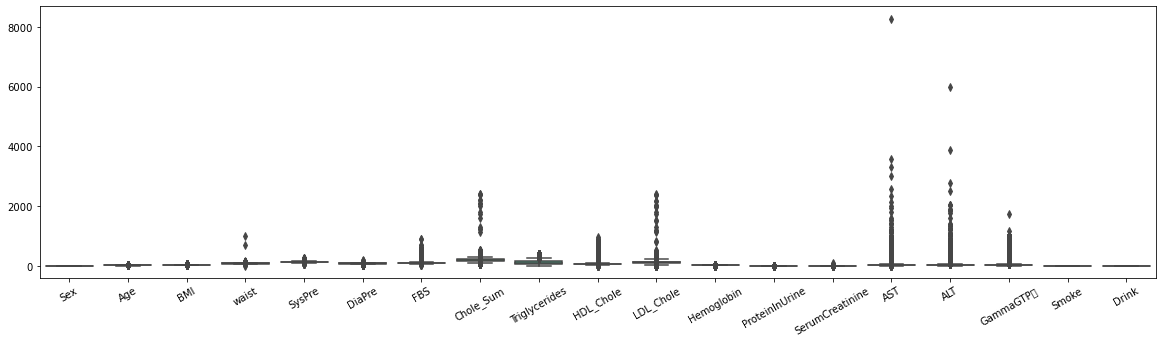

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,5))
sns.boxplot(data = health)
plt.xticks(rotation=30)

C:\Users\choib\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\choib\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\choib\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

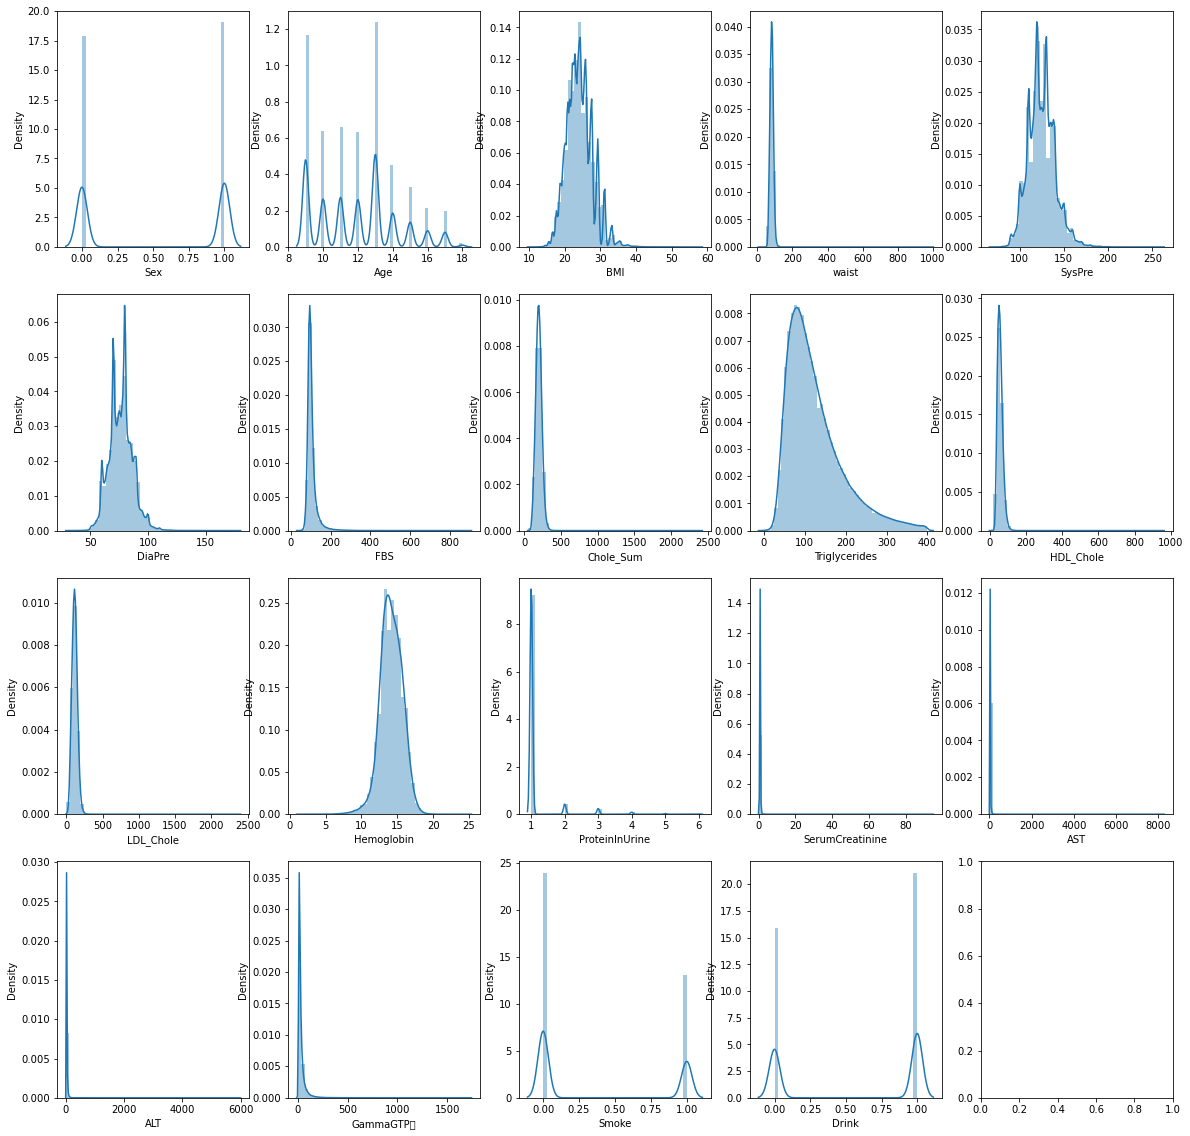

In [30]:
x = 0
y = 0 

fig, ax = plt.subplots(ncols=5, nrows=4,figsize=(20,20))
for i in health.columns:
    if(y==5):
        x+=1
        y=0
    sns.distplot(health[i], ax=ax[x,y])
    y+=1
